# Mercury Orbit
- by @fbientrigo at Github

# Orbita de Mercuio
Potencial efectivo:
$$
V_{\text{efectivo}} = - \frac{GM}{r} + \frac{L^2}{2 m^2 r^2} - \frac{GM}{c^2} \frac{L^2}{m^2 r^3}
$$

usando $l = L/m$

$$
V_{\text{efectivo}}= - \frac{GM}{r} + \frac{\mathcal{l}}{2 r^2} - \frac{GM}{c^2} \frac{\mathcal l}{ r^3}
$$

definiendo el radio especial: $r_s = \frac{2GM}{c^2}$

Así la ecuación para la orbita de mercurio
$$
\frac{dr}{d\tau}_{r_n, \phi_n} = \pm \sqrt{  \mathcal E^2 - c^2
+ \frac{GM}{r} - \frac{l^2}{2 r^2} + \frac{r_s}{2} \frac{l^2}{r^3}
}
$$

$$
\frac{d \phi}{d\tau}_{r_n, \phi_n} = \frac{l}{r_n^2}
$$

$$
\mathcal E = (1 - \frac{r_s}{r}) c \gamma
$$

donde $\gamma$ es el factor de corrección relativista

$$
\gamma = \frac{dt}{d\tau} = \frac{1}{ \sqrt{1 - \frac{v^2}{c^2}} }
$$


- 

In [82]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

e = 0.205
a = 5.79 # x 10^10 [m]

# c = 3e8
#l = 2.71e15
#G = 6.67e-11

G = 1
c = 1
# l = (1-e) * np.sqrt(a) * 10
l = 1

M = 0.2 #sol
r_s =  2 * G* M /c**2

# condiciones iniciales
r0 = 2.5
v0 = 0.4


gamma = lambda v: 1/np.sqrt(1 - (v/c)**2)
E_ = lambda r,v: (1 - r_s / r) * c * gamma(v)


#E = E_(r0, v0)
E = 1

In [75]:
def Veff_rel(r,l):
    return - G * M /r + l**2 /( 2 * r**2) - G * M * l**2 /(c**2 * r**3)

def Veff_newt(r,l):
    return -G*M/r + l**2/(2*r**2)

def dr_dtau(E,r,signo, Veff,l):
    return signo * np.sqrt( E**2 - c**2 - Veff(r,l) )


def dphi_dtau(r):
    return l / r**2


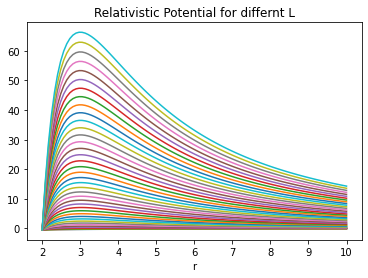

In [77]:
import matplotlib.pyplot as plt
import numpy as np

r_list = np.linspace(r_s,10, 100)
l_list = np.linspace(0, 60, 40)

for l_ in l_list:
    plt.plot(r_list,Veff_rel(r_list,l_))
plt.title("Relativistic Potential for differents L's")
plt.xlabel("r")
plt.show()

It is used Heun's method:

Being: 
$$
\frac{d y}{dt} = f(t,y)
$$

It is used an intermediate value, being the supposed next step in eulers method
$$
\hat y_{i+1} = y_i + h f(t_i, y_i)
$$

Then the real next step, is a mean between the euler step and the same step but using the intermediate next step
$$
y_{i+1} = y_i + \frac{h}{2} [ f(t_i, y_i) + f(t_{i+1},\hat y_{i+1}) ]
$$

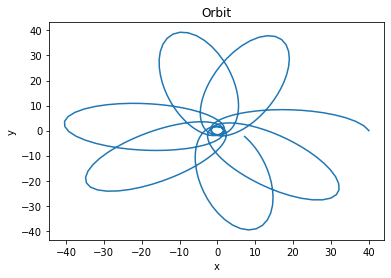

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def f1(theta, u):
    result = (3 * G*G * M*M / (L*L) * u*u - u + 1)
    return result

def f2(theta, uh):
    result = uh
    return result

def integration_heun(N, G, M, L, E, u0, uh0, theta0, dtheta):
    """
    solves u = 1/r, as a function of the angle
    """

    # Start calculations
    theta = theta0
    u = u0
    uh = uh0
    r = L*L / (G * M * u)

    # x,y for plotting
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    t = 0
    tau = 0

    # Create arrays to store position data
    x_arr = np.zeros(N)
    y_arr = np.zeros(N)

    r_arr = np.zeros(N)
    vel_arr = np.zeros(N)
    theta_arr = np.zeros(N)
    t_arr = np.zeros(N)
    tau_arr = np.zeros(N)

    # Evolve orbit
    for i in range(N):
        # Advance step
        u_o = u
        uh_o = uh
        h = dtheta

        # Integration using the method of Heun
        # intermediate value
        uh_hat = uh_o + h*f1(theta, u_o)
        # then we computa y_i+1
        u = u_o + 0.5*h*(f2(theta, uh_o) + f2(theta, uh_hat))

        # intermediate value
        u_hat = u_o + h*f2(theta, uh_o)
        
        # compute the speed
        uh = uh_o + 0.5*h*(f1(theta, u_o) + f1(theta, u_hat))

        # Compute radial coordinate
        r = L * L / (G * M * u)

        vel = - L * L / (G * M * u**2) * uh

        # Compute time coordinate, with the schw. metric
        d_tau = r * r * dtheta / L
        dt = E * d_tau / (1.0 - 2 * G * M / r)

        t = t + dt
        tau = tau + d_tau

        # Compute Cartesian coordinates
        x = r * np.cos(theta)
        y = r * np.sin(theta)

        # Save position data
        x_arr[i] = x
        y_arr[i] = y
        t_arr[i] = t
        tau_arr[i] = tau
        vel_arr[i] = vel

        r_arr[i] = r
        theta_arr[i] = theta

        # Update angle
        theta = theta + dtheta

    # Plot results
    plt.plot(x_arr, y_arr)
    plt.title("Orbit")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    return t_arr, tau_arr, r_arr, vel_arr, theta_arr



# Parameters
N = 1000      # Number of steps
G = 1.0         # Gravitational constant
M = 0.2         # Mass of gravitating object
L = 0.9        # Angular momentum of orbiting object
E = 0.5         # Energy of orbiting object


u0 = 0.1       # Initial inverse radius test particle
uh0 = 0.0       # Initial derivative inverse radius wrt theta

theta0 = 0      # Initial angle test particle
dtheta = 0.05  # Step size


t, tau, r, rvel, theta = integration_heun(N, G, M, L, E, u0, uh0, theta0, dtheta)


In [13]:
# exportas los datos creados:
import pandas as pd
import matplotlib.pyplot as plt

datos = pd.DataFrame({"t":t,"r":r,"velocity":rvel,"theta":theta, "tau":tau})
datos.head()

,t,r,velocity,theta,tau
0,5.194845,9.986768,-0.528598,0.00,4.986776
1,10.349559,9.947294,-1.047702,0.05,9.934209
2,15.438519,9.882283,-1.548236,0.10,14.817185
3,20.437738,9.792876,-2.021929,0.15,19.612206
4,25.325393,9.680598,-2.461641,0.20,24.297905


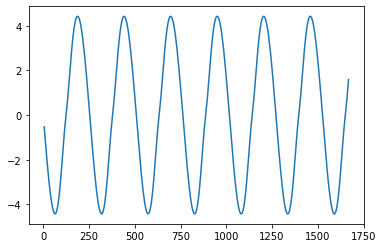

In [15]:
plt.plot(datos.t, datos.velocity)

but we can't directly use the time vs r data yet, we can see this plotting, 
because of the time steps not being constant, there's a difference on including time and not including it

Text(0.5, 1.0, 'r vs time')

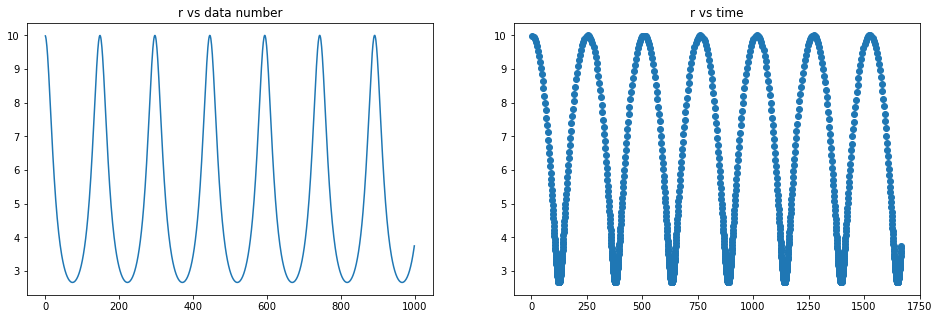

In [14]:
# how does the radius evolves:
fig,ax = plt.subplots(1,2, figsize=(16,5))

ax[0].plot(datos.r)
ax[0].set_title("r vs data number")

ax[1].scatter(datos.t, datos.r)
ax[1].set_title("r vs time")



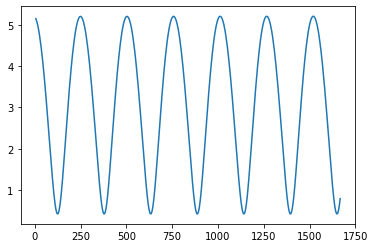

In [38]:
# because of relativity, the time steps aren't exact
time_steps = datos.t[1::].values - datos.t[:-1:].values 

plt.plot(datos.t[:-1:],time_steps)
plt.show()

[0.05 0.05 0.05 0.05 0.05]


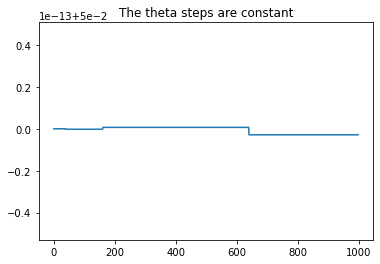

In [32]:
# while the steps of theta:
theta_steps = datos.theta[1::].values - datos.theta[:-1:].values 

print(theta_steps[:5])

plt.plot(theta_steps)
plt.title("The theta steps are constant")
plt.show()

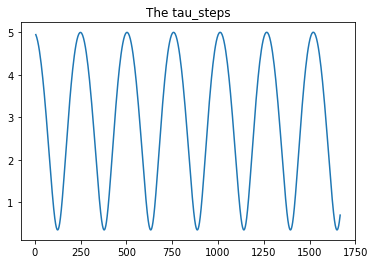

In [40]:
# steps on propper time, tau:
tau_steps = datos.tau[1::].values - datos.tau[:-1:].values 

plt.plot(datos.t[:-1:],tau_steps)
plt.title("The tau_steps")
plt.show()

In [17]:
datos.to_csv("./orbits/heun_E1L1.csv")

___

# what is the actual force of this model?
Even thought we used a change of variable, we still have the information of the original differential equation, relating time.

But as we saw the time coordinate is dependant on the approach to the central object, because of relativity the time for an outside observer is different to that of mercury; 



$$
\frac{dr}{d\tau} =\frac{dr}{d\phi} \frac{d\phi}{d\tau} =\frac{dr}{d\phi}\frac{l}{r^2}
$$

then the equation from the geodesic of mercury turns to be:
$$
\mathcal E^2 - c^2 = (\frac{dr}{d\phi})^2 \frac{l^2}{r^4} - c^2 \frac{r_s}{r} + \frac{l^2}{r^2} - \frac{r_s l^2}{r^3}
$$

cleaning:
$$
\frac{dr}{d\theta} = \pm \sqrt{ 
(\mathcal E^2 - c^2) \frac{r^4}{l^2} + \frac{c^2 r_s}{l^2} r^3
- r^2 + r_s r
 }
$$

$$
\Rightarrow \frac{dr}{d\theta} = f(r)
$$

if we use this for the model, we can only use the $v$, which mean using the velocity, look down further for what we actually utilize

In [52]:
# plot of this "force"
def mercury_force(r, G, M, l, E, sign=+1):
    """ the derivative of r with respect to theta """
    r_s = 2 * G * M / c**2
    return sign * np.sqrt(
        (E**2 - c**2) * (r**4 / l**2) + (c**2 * r_s / l**2 )* r**3
        - r**2 + r_s * r
        )

C:\Users\fbien.DESKTOP-6FMEAR7\AppData\Local\Temp\ipykernel_9060\1570508774.py:5: RuntimeWarning: invalid value encountered in sqrt
  return sign * np.sqrt(


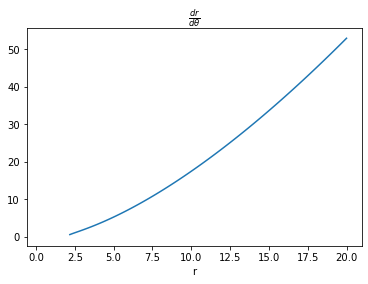

In [59]:
G = 1
c = 1
l = 1
M = 0.2
E = 1

r_s = 2 * G * M / c**2

r_arr = np.linspace(r_s, 20, 100)
force_arr = mercury_force(r_arr, G, M, l, E)

plt.plot(r_arr, force_arr)
plt.xlabel("r")
plt.title(r"$\frac{dr}{d\theta}$")
plt.show()

In the derivation of the other equations it's taken a second derivative, which helps to present the problem and which eliminates the use of the square root

besides our model works best with second order derivatives

$$
\frac{d^2 r}{d \phi^2} = 2\frac{\mathcal E^2 - c^2}{l^2} r^3
    + 3\frac{c^2 r_s}{2 l^2} r^2 - r + \frac{r_s}{2}
$$

In [5]:
# we can interpret this as a force, 
# remember, we are using theta as the time in our model

def relativistic_force(r, G, M, l, E):
    """ the second derivative of r with respect to theta 
    E is the relativistic energy per mass;
    l is the angular momentum per mass
    """
    r_s = 2 * G * M / c**2

    a3 = 2 * (E**2 - c**2) / l**2
    a2 = 3 * (c**2 * r_s)/(2 * l**2)
    a1 = -1
    a0 = r_s / 2

    return a3 * r**3 + a2 * r**2 + a1 * r + a0

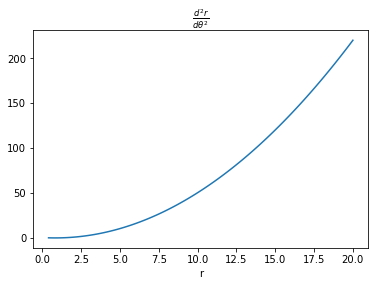

In [6]:
# Plotting
G, c, E = 1, 1,1
l = 1
M = 0.2

r_s = 2 * G * M / c**2

r_arr = np.linspace(r_s, 20, 100)
force_arr = relativistic_force(r_arr, G, M, l, E)

plt.plot(r_arr, force_arr)
plt.xlabel("r")
plt.title(r"$\frac{d^2r}{d\theta^2}$")
plt.show()

this is excelent, because we have a polynomial, with pretty clear coefficients
so our model will be learning this function:

$$
\frac{d^2 r}{ d \phi^2} = f(r)
$$

remmeber that inside it does the separation: 
$v = \frac{dr}{d\phi}$
which ends up in
$$
v = f(r)
$$

$$
\frac{dr}{d\phi} = v
$$